In [1]:
def strtomonth(mes):
  if mes == "Jan":  monthNUM = 1;
  elif mes == "Feb":  monthNUM = 2;
  elif mes == "Mar":  monthNUM = 3;
  elif mes == "Apr":  monthNUM = 4;
  elif mes == "May":  monthNUM = 5;
  elif mes == "Jun":  monthNUM = 6;
  elif mes == "Jul":  monthNUM = 7;
  elif mes == "Aug":  monthNUM = 8;
  elif mes == "Sep":  monthNUM = 9;
  elif mes == "Oct": monthNUM = 10;
  elif mes == "Nov": monthNUM = 11;
  elif mes == "Dec": monthNUM = 12;
  else: print('invalid');
  return monthNUM

from datetime import datetime,timedelta
import glob
import numpy as np
import pandas as pd
import os
import tqdm.notebook as tq
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
from matplotlib.widgets  import RectangleSelector, Button, TextBox
import seaborn as sns


sns.set_palette("Spectral")
sns.set_style('whitegrid')


Bad key text.latex.preview in file C:\Users\lukan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\lukan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\lukan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
import matplotlib.pyplot as plt

> # Gerando a lista de diretórios que serão lidos para contabilizar a distância percorrida

In [3]:
path = input('insira o path: ') 
# D:\IC\VPA\Arquivos de Registro\Tracking\Sozinho\controle\Or328
# D:\IC\VPA\Arquivos de Registro\Tracking\Sozinho\controle\Or343
animal = input('insira o nome do animal: ')

insira o path: D:\IC\VPA\Arquivos de Registro\Tracking\Sozinho\controle\Or328
insira o nome do animal: Or328


In [4]:
list_folders = sorted(glob.glob(path + "/*/"))

list_filenames = np.array([])
for folder in tq.tqdm(list_folders):
    filenames = glob.glob(os.path.join(folder, "*.csv"))
    
    list_filenames = np.hstack([list_filenames, filenames])

list_filenames = sorted(list_filenames)
list_filenames

  0%|          | 0/7 [00:00<?, ?it/s]

['D:\\IC\\VPA\\Arquivos de Registro\\Tracking\\Sozinho\\controle\\Or328\\0927\\Or328_27-Sep-2019 15_35_20.csv',
 'D:\\IC\\VPA\\Arquivos de Registro\\Tracking\\Sozinho\\controle\\Or328\\0927\\Or328_27-Sep-2019 15_52_21.csv',
 'D:\\IC\\VPA\\Arquivos de Registro\\Tracking\\Sozinho\\controle\\Or328\\0927\\Or328_27-Sep-2019 16_09_22.csv',
 'D:\\IC\\VPA\\Arquivos de Registro\\Tracking\\Sozinho\\controle\\Or328\\0927\\Or328_27-Sep-2019 16_26_23.csv',
 'D:\\IC\\VPA\\Arquivos de Registro\\Tracking\\Sozinho\\controle\\Or328\\0927\\Or328_27-Sep-2019 16_43_24.csv',
 'D:\\IC\\VPA\\Arquivos de Registro\\Tracking\\Sozinho\\controle\\Or328\\0927\\Or328_27-Sep-2019 17_00_25.csv',
 'D:\\IC\\VPA\\Arquivos de Registro\\Tracking\\Sozinho\\controle\\Or328\\0927\\Or328_27-Sep-2019 17_17_26.csv',
 'D:\\IC\\VPA\\Arquivos de Registro\\Tracking\\Sozinho\\controle\\Or328\\0927\\Or328_27-Sep-2019 17_34_26.csv',
 'D:\\IC\\VPA\\Arquivos de Registro\\Tracking\\Sozinho\\controle\\Or328\\0927\\Or328_27-Sep-2019 17_51_2

> # Checando luz: 

In [5]:
# 0 declarando variavies -------------------------------------------------------------------------------------------
coord = np.array([])
luz = True
light_on = []

for k,j in enumerate(tq.tqdm(list_filenames)): ## for geral que irá caminhar por cada filename
    
    # 1 lendo filename ---------------------------------------------------------------------------------------------
    filename = j
    dataSet = pd.read_csv(filename,names = ['a','b','c','d','e','f','g']) ## lendo filename
    dataSet_np = np.array(dataSet) ## transformando em numpy array para ganhar velocidade de processamento
    # --------------------------------------------------------------------------------------------------------------
    
    # 2 separando os dados de tempo e coordenada -------------------------------------------------------------------
    timet = dataSet_np[:,4:] 
    coord = dataSet_np[:,1:3]
    # --------------------------------------------------------------------------------------------------------------
    
    for i in range(len(timet)): ## for que irá caminhar por cada linha da tabela lida
        
        # 3 extraindo os dados de tempo ----------------------------------------------------------------------------
        ano = int(filename[len(filename)-17:len(filename)-13])
        mes = int(strtomonth(filename[len(filename)-21:len(filename)-18]))
        dia = int(filename[len(filename)-24:len(filename)-22])
        hora = int(timet[i,0])
        minu = int(timet[i,1])
        seg = int(timet[i,2])
        mics = int(100*(dataSet_np[i,6]%1))
        # ---------------------------------------------------------------------------------------------------------- 
    
        # 4 checando ligar/desligar da luz -------------------------------------------------------------------------
        if coord[i,0] == 160.5 and coord[i,1] == 120.5 and luz == True:
            print(Back.BLACK + Fore.WHITE + " OFF →", datetime(ano,mes,dia,hora,minu,seg), "", filename, "")
            luz = False

        elif coord[i,0] != 160.5 and coord[i,1] != 120.5 and luz == False:
            print(Back.WHITE + Fore.BLACK + " ON  →", datetime(ano,mes,dia,hora,minu,seg), "", filename, "")
            
            light_on.append(datetime(ano,mes,dia,hora,minu,seg,mics))
            luz = True
        # ----------------------------------------------------------------------------------------------------------

  0%|          | 0/504 [00:00<?, ?it/s]

 OFF → 2019-09-27 19:51:41  D:\IC\VPA\Arquivos de Registro\Tracking\Sozinho\controle\Or328\0927\Or328_27-Sep-2019 20_07_34.csv 
 ON  → 2019-09-28 05:48:04  D:\IC\VPA\Arquivos de Registro\Tracking\Sozinho\controle\Or328\0928\Or328_28-Sep-2019 06_03_00.csv 
 OFF → 2019-09-28 19:51:33  D:\IC\VPA\Arquivos de Registro\Tracking\Sozinho\controle\Or328\0928\Or328_28-Sep-2019 19_56_40.csv 
 ON  → 2019-09-29 05:48:05  D:\IC\VPA\Arquivos de Registro\Tracking\Sozinho\controle\Or328\0929\Or328_29-Sep-2019 05_52_07.csv 
 OFF → 2019-09-29 19:51:31  D:\IC\VPA\Arquivos de Registro\Tracking\Sozinho\controle\Or328\0929\Or328_29-Sep-2019 20_02_05.csv 
 ON  → 2019-09-30 05:47:48  D:\IC\VPA\Arquivos de Registro\Tracking\Sozinho\controle\Or328\0930\Or328_30-Sep-2019 05_57_31.csv 
 OFF → 2019-09-30 19:51:31  D:\IC\VPA\Arquivos de Registro\Tracking\Sozinho\controle\Or328\0930\Or328_30-Sep-2019 19_54_37.csv 
 ON  → 2019-10-01 05:47:59  D:\IC\VPA\Arquivos de Registro\Tracking\Sozinho\controle\Or328\1001\Or328_01

### Para animais com fundo preto

In [4]:
y134_light_on = [datetime(2019, 8, 26, 5, 50, 9, 28),
                 datetime(2019, 8, 27, 5, 50, 3, 86),
                 datetime(2019, 8, 28, 5, 50, 10, 59),
                 datetime(2019, 8, 29, 5, 50, 7, 83),
                 datetime(2019, 8, 30, 5, 50, 4, 39),
                 datetime(2019, 8, 31, 5, 49, 49, 23)]
wh621_light_on = [datetime(2019, 10, 24, 6, 7, 1, 70),
                 datetime(2019, 10, 25, 6, 6, 48, 56),
                 datetime(2019, 10, 26, 6, 6, 51, 53),
                 datetime(2019, 10, 27, 6, 6, 42, 19),
                 datetime(2019, 10, 28, 6, 6, 42, 33),
                 datetime(2019, 10, 29, 6, 6, 41, 22)]
wh674_light_on = [datetime(2021, 6, 6, 5, 52, 53, 85),
                  datetime(2021, 6, 7, 5, 52, 53, 52),
                  datetime(2021, 6, 8, 5, 52, 52, 86),
                  datetime(2021, 6, 9, 5, 52, 47, 62),
                  datetime(2021, 6, 10, 5, 52, 41, 14),
                  datetime(2021, 6, 11, 5, 52, 33, 47)]
bk440_light_on = [datetime(2021, 4, 4, 6, 9, 10, 75),
                  datetime(2021, 4, 5, 6, 8, 55, 7),
                  datetime(2021, 4, 6, 6, 8, 51, 31),
                  datetime(2021, 4, 7, 6, 8, 39, 23),
                  datetime(2021, 4, 8, 6, 8, 20, 73),
                  datetime(2021, 4, 9, 6, 9, 8, 32)]
wh621_light_on = [datetime(2019, 10, 24, 6, 7, 1),
                  datetime(2019, 10, 25, 6, 6, 48),
                  datetime(2019, 10, 8, 5, 52, 52, 86),
                  datetime(2019, 10, 9, 5, 52, 47, 62),
                  datetime(2019, 10, 10, 5, 52, 41, 14),
                  datetime(2019, 10, 11, 5, 52, 33, 47)]

print("lembrar de trocar o nome")
light_on = wh621_light_on

> # Primeiro calculo de distância pra checar dados

In [6]:
inter_str = input('defina o intervalo (hh:mm):')
intervalo = timedelta(minutes=int(inter_str[3:]), hours=int(inter_str[:2]))
quinze_horas = datetime(2019,8,14,21,0,0) - datetime(2019,8,14,6,0,0,0)

defina o intervalo (hh:mm):00:30


In [7]:
# 0 declarando variavies --------------------------------------------------------------------------------------------
coord = np.array([])
dist_cont = 0
dist_interval = []
times_axis = []
dia_check = 0 
mes_check = 0
first_loop = True
begin = False
on = 0
timefill = 0
# -------------------------------------------------------------------------------------------------------------------

for k,j in enumerate(tq.tqdm(list_filenames)): ## for geral que irá caminhar por cada filename
    
    # 1 lendo filename ----------------------------------------------------------------------------------------------
    filename = j
    dataSet = pd.read_csv(filename,names = ['a','b','c','d','e','f','g']) ## lendo filename
        # 1.1 resolvendo problemas ==================================================================================
        # Problema: quando o tracking não encontra o animal ele registra a coordenada como (0,0). Assim,  
        # não podemos calcular essa falsa distancia percorrida;
        # Resolução: replace zeros with previous non zero value 
    dataSet['b'] = dataSet['b'].replace(to_replace=0, method='ffill')
    dataSet['c'] = dataSet['c'].replace(to_replace=0, method='ffill')
        # ===========================================================================================================
    dataSet_np = np.array(dataSet) ## transformando em numpy array para ganhar velocidade de processamento
    # ---------------------------------------------------------------------------------------------------------------
    
    
    # 2 separando os dados de tempo e coordenada --------------------------------------------------------------------
    timet = dataSet_np[:,4:] 
    dT = dataSet_np[:,3] 
    coord = dataSet_np[:,1:3]
    # ---------------------------------------------------------------------------------------------------------------
    
    
    for i in range(len(timet)): ## for que irá caminhar por cada linha da tabela lida
        
        # 3 extraindo os dados de tempo -----------------------------------------------------------------------------
        ano = int(filename[len(filename)-17:len(filename)-13])
        mes = int(strtomonth(filename[len(filename)-21:len(filename)-18]))
        dia = int(filename[len(filename)-24:len(filename)-22])
        hora = int(timet[i,0])
        minu = int(timet[i,1])
        seg = int(timet[i,2])
        mics = int(100*(dataSet_np[i,6]%1))
        # -----------------------------------------------------------------------------------------------------------
        
        
        # 4 Identificando arquivos com problemas --------------------------------------------------------------------
        time3_check = datetime(ano,mes,dia,hora,minu,seg,mics)
        dois_minutos = datetime(2019,8,14,12,2,0,0) - datetime(2019,8,14,12,0,0,0)
        um_dia = datetime(2019,8,15,12,0,0,0) - datetime(2019,8,14,12,0,0,0)
        if begin == True:
            if (time3_check - time2) > dois_minutos and (time3_check - time2) < um_dia:
                print(Style.RESET_ALL + '-----------------------------------------------------')
                print('talvez tenhamos um problema no arquivo: ', filename)
                print('')
                if (time3_check - time2) > dois_minutos:
                    print('O tempo de atualização de coordenadas foi mt alto:', time3_check - time2)
                print('')
                print('tempo de atualização: t =', time2,';t+1 = ', time3_check)
                print('-----------------------------------------------------')
        # -----------------------------------------------------------------------------------------------------------
        
        
        # 5 resolvendo problemas ====================================================================================
        # PROBLEMA : quando temos arquivos q começam em um dia e terminam no outro as primeiras linhas receberão er-
        # roneamente os dados de dia e mês do dia seguinte; 
        # OBS.: os dados de ano, mes e dia são retirados do nome do arquivo que são nomeados com a data do final do
        # intervalo de registro (17 minutos).

        if dia_check != dia:
            if hora == 23:
                dia = dia_check
            else:
                dia_check = dia

        if mes_check != mes:
            if hora == 23:
                mes = mes_check
            else:
                mes_check = mes
        # ==========================================================================================================
                    
        if datetime(ano,mes,dia,hora,minu,seg,mics) >= light_on[on]: ## checando a hora inicial (light on) 
            
            
            # 6 preenchendo variaveis no primeiro loop -------------------------------------------------------------
            if begin == False: 
                # 6.1 preenchendo os pontos vetoriais --------------------------------------------------------------
                b = coord[i,:]
                a = coord[i,:]
            
                # 6.2 preenchendo os datetime ----------------------------------------------------------------------  
                print(Back.BLACK + Fore.WHITE + "==================== dia {} ====================".format(on+1))
                print(Back.WHITE + Fore.BLACK + "         light on → {}        ".format(datetime(ano,mes,dia,hora,minu,seg)))
                time1 = datetime(ano,mes,dia,hora,minu,seg,mics)
                dia_check = dia
                mes_check = mes
                begin = True
            # ------------------------------------------------------------------------------------------------------
            
        
            if begin == True: ## pós o primeiro loop
                
                
                # 7 preenchendo os pontos vetoriais -----------------------------------------------------------------
                a = b
                b = coord[i,:]
                #------------------------------------------------------------------------------------------------------
            

                # 8 preenchendo os datetime ---------------------------------------------------------------------------
                time2 = datetime(ano,mes,dia,hora,minu,seg,mics)
                #------------------------------------------------------------------------------------------------------


                # 9 calculando a distancia percorrida -----------------------------------------------------------------
                vecR = b-a                                   
                dist_cont += np.sqrt(sum(np.power(vecR,2))) 
                # -----------------------------------------------------------------------------------------------------

                
                # 10 gerando tabela de distancia por intervalo --------------------------------------------------------
                if time2 - time1 >= intervalo: 
                    if ((time2.minute == light_on[on].minute) or (time2.minute == (light_on[on] + intervalo).minute)) and \
                       (round((time2 - time1).total_seconds()/60) <= round(intervalo.total_seconds()/60)):
                        print(Back.GREEN + Fore.WHITE + " ✔ " + Style.RESET_ALL, datetime(ano,mes,dia,hora,minu,seg), int(dist_cont))
                    else:
                        print(Back.RED + Fore.WHITE + " ✖ " + Style.RESET_ALL, datetime(ano,mes,dia,hora,minu,seg), int(dist_cont))
                        
                    dist_interval.append(dist_cont)

                    time1 = time2
                    times_axis.append(time1)
                    dist_cont = 0
                # ----------------------------------------------------------------------------------------------------- 

                if time2 - light_on[on] >= quinze_horas:
                    begin = False
                    dist_cont = 0
                    
                    # 11 preenchendo os zeros da noite ----------------------------------------------------------------
                    timefill = time2
                    for fill in range(19):
                        dist_interval.append(0)                        
                        times_axis.append(timefill)
                                                        
                        print(Back.WHITE + Fore.BLACK + " ▣ " + Style.RESET_ALL, timefill.replace(microsecond=0), 0)
                        
                        
                        timefill = timefill + timedelta(minutes=int(inter_str[3:]), hours=int(inter_str[:2]))
                    # -------------------------------------------------------------------------------------------------
                    
                    on += 1

  0%|          | 0/240 [00:00<?, ?it/s]

==================== dia 1 ====================
         light on → 2019-08-03 06:00:24        
 ✔  2019-08-03 06:30:24 57892
 ✔  2019-08-03 07:00:24 39322
 ✔  2019-08-03 07:30:24 70593
 ✔  2019-08-03 08:00:24 102771
 ✔  2019-08-03 08:30:24 135175
 ✔  2019-08-03 09:00:24 125535
 ✔  2019-08-03 09:30:24 115743
 ✔  2019-08-03 10:00:24 157536
 ✔  2019-08-03 10:30:24 147879
 ✔  2019-08-03 11:00:24 129945
 ✔  2019-08-03 11:30:24 108651
 ✔  2019-08-03 12:00:24 65355
 ✔  2019-08-03 12:30:24 134548
 ✔  2019-08-03 13:00:24 83068
 ✔  2019-08-03 13:30:24 80403
 ✔  2019-08-03 14:00:24 60281
 ✔  2019-08-03 14:30:24 69099
 ✔  2019-08-03 15:00:24 33294
 ✔  2019-08-03 15:30:24 55724
 ✔  2019-08-03 16:00:24 38214
 ✔  2019-08-03 16:30:24 29261
 ✔  2019-08-03 17:00:25 47660
 ✔  2019-08-03 17:30:25 29926
 ✔  2019-08-03 18:00:25 63048
 ✔  2019-08-03 18:30:25 31655
 ✔  2019-08-03 19:00:25 44627
 ✔  2019-08-03 19:30:25 49967
 ✔  2019-08-03 20:00:25 32855
-----------------------------------------------------
t

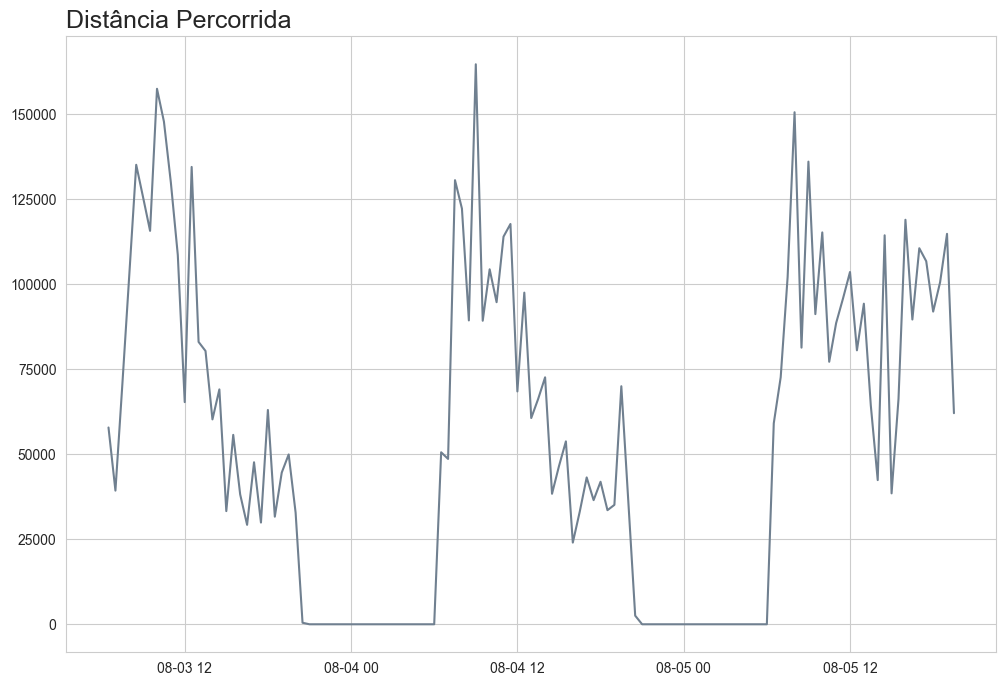

In [9]:
dist_interval_df = pd.DataFrame(np.stack([times_axis, dist_interval], axis = 1), columns = ["time", "dist"])
plt.figure(figsize = [12,8])
plt.plot(dist_interval_df["time"], dist_interval_df["dist"], color = "slategray")
plt.title("Distância Percorrida", loc = "left", fontsize = 18)
plt.show()

> # Interface para filtragem

### Concatenando todas coordenadas:

In [10]:
coord_total = []
timet_total = []
for idx, filename in enumerate(tq.tqdm(list_filenames)):
    dataSet = pd.read_csv(filename,names = ['a','b','c','d','e','f','g']) 
    dataSet = dataSet.loc[~(dataSet[['b','c']]==0).all(axis=1)]
    dataSet_np = np.array(dataSet) 
    
    coord = dataSet_np[:,1:3]
    timet = dataSet_np[:,3] 
    
    if idx == 0:
        coord_total = coord
        timet_total = timet
    else:
        coord_total = np.concatenate([coord_total, coord], axis = 0)
        timet_total = np.concatenate([timet_total, timet], axis = 0)

  0%|          | 0/240 [00:00<?, ?it/s]

### Definindo pontos por plot:

In [11]:
len_plot = int(input("Digite o número de pontos por plot (500000): "))

Digite o número de pontos por plot (500000): 500000


### Interface:

In [12]:
%matplotlib qt

In [13]:
num_of_plots = len(coord_total)//len_plot
len_plot_list = [len_plot]*num_of_plots
if len(coord_total)%len_plot>0:
    size_of_last_plot = len(coord_total) - (num_of_plots*len_plot)
    len_plot_list.append(size_of_last_plot)

SPOT_MASK = {}
PLOT_INDEX = 0
for idx, value in enumerate(len_plot_list):
    SPOT_MASK[idx] = np.array([False]*value)
    
var_start = 0 + len_plot_list[PLOT_INDEX]*PLOT_INDEX
var_end = var_start + len_plot_list[PLOT_INDEX]
XDATA, YDATA = coord_total[var_start:var_end,0], coord_total[var_start:var_end,1]

linecolor = "slategray"
pointcolor = "crimson"
ax = plt.subplot()
line, = ax.plot(XDATA, YDATA, linewidth = 0.05, color = linecolor)
point, = ax.plot([],[], 'o', color = pointcolor, markersize = 0.1)
ax.set_title("PLOT {}/{}".format(PLOT_INDEX+1, len(len_plot_list)), 
             color = linecolor, loc ="left", fontsize = 10)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(0,240)
ax.set_xlim(0,320)
plt.suptitle("SPOT FILTER", fontsize = 18);

def line_select_callback(eclick, erelease):
    global SPOT_MASK, PLOT_INDEX, XDATA, YDATA

    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    spot_unit = np.array((XDATA > min(x1,x2)) & (XDATA < max(x1,x2)) & \
                         (YDATA > min(y1,y2)) & (YDATA < max(y1,y2)))
    
    
    SPOT_MASK[PLOT_INDEX] = SPOT_MASK[PLOT_INDEX] + spot_unit
    

    xmasked = XDATA[~SPOT_MASK[PLOT_INDEX]]
    ymasked = YDATA[~SPOT_MASK[PLOT_INDEX]]
    line.set_xdata(xmasked)
    line.set_ydata(ymasked)
    
    xspot = XDATA[SPOT_MASK[PLOT_INDEX]]
    yspot = YDATA[SPOT_MASK[PLOT_INDEX]]
    point.set_xdata(xspot)
    point.set_ydata(yspot)
    
    ax.set_title("PLOT {}/{}".format(PLOT_INDEX+1, len(len_plot_list)), 
                 color = linecolor, loc ="left", fontsize = 10)
        
class Index(object):
    ind = 0
    linewidth = 0.05
    
    def replot(SPOT_MASK, PLOT_INDEX, XDATA, YDATA):
        xmasked = XDATA[~SPOT_MASK[PLOT_INDEX]]
        ymasked = YDATA[~SPOT_MASK[PLOT_INDEX]]
        line.set_xdata(xmasked)
        line.set_ydata(ymasked)

        xspot = XDATA[SPOT_MASK[PLOT_INDEX]]
        yspot = YDATA[SPOT_MASK[PLOT_INDEX]]
        point.set_xdata(xspot)
        point.set_ydata(yspot)
        
        ax.set_title("PLOT {}/{}".format(PLOT_INDEX+1, len(len_plot_list)), 
                     color = linecolor, loc ="left", fontsize = 10)
        plt.draw()
        
    def next(self, event):
        global SPOT_MASK, PLOT_INDEX, XDATA, YDATA
        
        self.ind += 1
        
        PLOT_INDEX = self.ind
        
        var_start = 0 + len_plot_list[PLOT_INDEX]*PLOT_INDEX
        var_end = var_start + len_plot_list[PLOT_INDEX]
        XDATA, YDATA = coord_total[var_start:var_end,0], coord_total[var_start:var_end,1]
        
        Index.replot(SPOT_MASK, PLOT_INDEX, XDATA, YDATA)

    def prev(self, event):
        global SPOT_MASK, PLOT_INDEX, XDATA, YDATA
        
        self.ind -= 1
        
        PLOT_INDEX = self.ind
        
        var_start = 0 + len_plot_list[PLOT_INDEX]*PLOT_INDEX
        var_end = var_start + len_plot_list[PLOT_INDEX]
        XDATA, YDATA = coord_total[var_start:var_end,0], coord_total[var_start:var_end,1]
        
        Index.replot(SPOT_MASK, PLOT_INDEX, XDATA, YDATA)
        
    def reset_SPOT_MASK(self, event):
        global SPOT_MASK, PLOT_INDEX, XDATA, YDATA
        
        SPOT_MASK[PLOT_INDEX] = np.array([False]*len_plot_list[PLOT_INDEX])
        
        Index.replot(SPOT_MASK, PLOT_INDEX, XDATA, YDATA)

    def up(self, event):
        self.linewidth += 0.01
        btext.set_val(round(self.linewidth, 2))
        
        line.set_linewidth(self.linewidth)
        
    def down(self, event):
        self.linewidth -= 0.01
        btext.set_val(round(self.linewidth, 2))
        
        line.set_linewidth(self.linewidth)
    
        
rs = RectangleSelector(ax, line_select_callback,
                       drawtype='box', useblit=False, button=[1], 
                       minspanx=5, minspany=5, spancoords='pixels', 
                       interactive=True)

callback = Index()

axtext = plt.axes([0.485, 0.02, 0.06, 0.075])
axup = plt.axes([0.52+0.025, 0.02+0.0375, 0.025, 0.0375])
axdown = plt.axes([0.52+0.025, 0.02, 0.025, 0.0375])
axreset = plt.axes([0.58, 0.02, 0.1, 0.075])
axprev = plt.axes([0.69, 0.02, 0.1, 0.075])
axnext = plt.axes([0.80, 0.02, 0.1, 0.075])

btext = TextBox(axtext, "", 0.05)
bup = Button(axup, '↑')
bup.on_clicked(callback.up)
bdown = Button(axdown, '↓')
bdown.on_clicked(callback.down)
breset = Button(axreset, 'Reset')
breset.on_clicked(callback.reset_SPOT_MASK)
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)


plt.show()

C:\Users\lukan\AppData\Local\Temp\ipykernel_2248\1833916646.py:119: MatplotlibDeprecationWarning: 
The 'drawtype' parameter of __init__() was deprecated in Matplotlib 3.5 and will be removed two minor releases later. If any parameter follows 'drawtype', they should be passed as keyword, not positionally.
  rs = RectangleSelector(ax, line_select_callback,


In [14]:
filtered_mask = np.concatenate(list(SPOT_MASK.values()))

> # Calculo de distancia + Filter

In [15]:
# 0 declarando variavies --------------------------------------------------------------------------------------------
coord = np.array([])
dist_cont = 0
dist_interval = []
times_axis = []
dia_check = 0 
mes_check = 0
first_loop = True
begin = False
on = 0
timefill = 0

count_geral = 0
# -------------------------------------------------------------------------------------------------------------------

for k,j in enumerate(tq.tqdm(list_filenames)): ## for geral que irá caminhar por cada filename
    
    # 1 lendo filename ----------------------------------------------------------------------------------------------
    filename = j
    dataSet = pd.read_csv(filename,names = ['a','b','c','d','e','f','g']) ## lendo filename
        # 1.1 resolvendo problemas ==================================================================================
        # Problema: quando o tracking não encontra o animal ele registra a coordenada como (0,0). Assim,  
        # não podemos calcular essa falsa distancia percorrida;
        # Resolução: se a coordenada for zero mantemos a = b até q o tracking volte a funcionar (coordenada 
        # deixa de ser 0), quando b receberá a nova coordenada real ignorando todo o periodo zerado
    dataSet = dataSet.loc[~(dataSet[['b','c']]==0).all(axis=1)] 
        # ===========================================================================================================
    dataSet_np = np.array(dataSet) ## transformando em numpy array para ganhar velocidade de processamento
    # ---------------------------------------------------------------------------------------------------------------
    
    
    # 2 separando os dados de tempo e coordenada --------------------------------------------------------------------
    timet = dataSet_np[:,4:] 
    dT = dataSet_np[:,3] 
    coord = dataSet_np[:,1:3]
    # ---------------------------------------------------------------------------------------------------------------
    
    
    for i in range(len(timet)): ## for que irá caminhar por cada linha da tabela lida
        
        # 3 extraindo os dados de tempo -----------------------------------------------------------------------------
        ano = int(filename[len(filename)-17:len(filename)-13])
        mes = int(strtomonth(filename[len(filename)-21:len(filename)-18]))
        dia = int(filename[len(filename)-24:len(filename)-22])
        hora = int(timet[i,0])
        minu = int(timet[i,1])
        seg = int(timet[i,2])
        mics = int(100*(dataSet_np[i,6]%1))
        # -----------------------------------------------------------------------------------------------------------
        
        
        # 4 Identificando arquivos com problemas --------------------------------------------------------------------
        time3_check = datetime(ano,mes,dia,hora,minu,seg,mics)
        dois_minutos = datetime(2019,8,14,12,2,0,0) - datetime(2019,8,14,12,0,0,0)
        um_dia = datetime(2019,8,15,12,0,0,0) - datetime(2019,8,14,12,0,0,0)
        if begin == True:
            if (time3_check - time2) > dois_minutos and (time3_check - time2) < um_dia:
                print(Style.RESET_ALL + '-----------------------------------------------------')
                print('talvez tenhamos um problema no arquivo: ', filename)
                print('')
                if (time3_check - time2) > dois_minutos:
                    print('O tempo de atualização de coordenadas foi mt alto:', time3_check - time2)
                print('')
                print('tempo de atualização: t =', time2,';t+1 = ', time3_check)
                print('-----------------------------------------------------')
        # -----------------------------------------------------------------------------------------------------------
        
        
        # 5 resolvendo problemas ====================================================================================
        # PROBLEMA : quando temos arquivos q começam em um dia e terminam no outro as primeiras linhas receberão er-
        # roneamente os dados de dia e mês do dia seguinte; 
        # OBS.: os dados de ano, mes e dia são retirados do nome do arquivo que são nomeados com a data do final do
        # intervalo de registro (17 minutos).

        if dia_check != dia:
            if hora == 23:
                dia = dia_check
            else:
                dia_check = dia

        if mes_check != mes:
            if hora == 23:
                mes = mes_check
            else:
                mes_check = mes
        # ==========================================================================================================
                    
        if datetime(ano,mes,dia,hora,minu,seg,mics) >= light_on[on]: ## checando a hora inicial (light on) 
            
            
            # 6 preenchendo variaveis no primeiro loop -------------------------------------------------------------
            if begin == False: 
                # 6.1 preenchendo os pontos vetoriais --------------------------------------------------------------
                b = coord[i,:]
                a = coord[i,:]
            
                # 6.2 preenchendo os datetime ----------------------------------------------------------------------  
                print(Back.BLACK + Fore.WHITE + "==================== dia {} ====================".format(on+1))
                print(Back.WHITE + Fore.BLACK + "         light on → {}        ".format(datetime(ano,mes,dia,hora,minu,seg)))
                time1 = datetime(ano,mes,dia,hora,minu,seg,mics)
                dia_check = dia
                mes_check = mes
                begin = True
            # ------------------------------------------------------------------------------------------------------
            
        
            if begin == True: ## pós o primeiro loop
                
                
                # 7 preenchendo os pontos vetoriais -----------------------------------------------------------------
                a = b
                b = coord[i,:]
                
                # 7.1 resolvendo problemas =======================================================================
                    # PROBLEMA: quando o tracking não encontra o animal e tem alguma mancha no contraste ele registra a
                    # coordenada da mancha e não podemos calcular essa falsa distancia percorrida;
                    # RESOLUÇÃO: se a coordenada corresponder aos pontos marcados na filtragem a nova coordenada é ignorada,
                    # portanto, "b" recebe "a" para que essa distancia n seja contabilizada.
                    # INCONSISTENCIAS:
                    
                if filtered_mask[count_geral]: 
                    b = a
                # =================================================================================================
                #------------------------------------------------------------------------------------------------------
            

                # 8 preenchendo os datetime ---------------------------------------------------------------------------
                time2 = datetime(ano,mes,dia,hora,minu,seg,mics)
                #------------------------------------------------------------------------------------------------------


                # 9 calculando a distancia percorrida -----------------------------------------------------------------
                vecR = b-a                                   
                dist_cont += np.sqrt(sum(np.power(vecR,2))) 
                # -----------------------------------------------------------------------------------------------------

                
                # 10 gerando tabela de distancia por intervalo --------------------------------------------------------
                if time2 - time1 >= intervalo: 
                    if ((time2.minute == light_on[on].minute) or (time2.minute == (light_on[on] + intervalo).minute)) and \
                       (round((time2 - time1).total_seconds()/60) <= round(intervalo.total_seconds()/60)):
                        print(Back.GREEN + Fore.WHITE + " ✔ " + Style.RESET_ALL, datetime(ano,mes,dia,hora,minu,seg), int(dist_cont))
                    else:
                        print(Back.RED + Fore.WHITE + " ✖ " + Style.RESET_ALL, datetime(ano,mes,dia,hora,minu,seg), int(dist_cont))
                        
                    dist_interval.append(dist_cont)

                    time1 = time2
                    times_axis.append(time1)
                    dist_cont = 0
                # ----------------------------------------------------------------------------------------------------- 

                if time2 - light_on[on] >= quinze_horas:
                    begin = False
                    dist_cont = 0
                    
                    # 11 preenchendo os zeros da noite ----------------------------------------------------------------
                    timefill = time2
                    for fill in range(19):
                        dist_interval.append(0)                        
                        times_axis.append(timefill)
                                                        
                        print(Back.WHITE + Fore.BLACK + " ▣ " + Style.RESET_ALL, timefill.replace(microsecond=0), 0)
                        
                        
                        timefill = timefill + timedelta(minutes=int(inter_str[3:]), hours=int(inter_str[:2]))
                    # -------------------------------------------------------------------------------------------------
                    
                    on += 1
                    
        count_geral += 1

  0%|          | 0/240 [00:00<?, ?it/s]

==================== dia 1 ====================
         light on → 2019-08-03 06:00:24        
 ✔  2019-08-03 06:30:24 42534
 ✔  2019-08-03 07:00:24 14662
 ✔  2019-08-03 07:30:24 59562
 ✔  2019-08-03 08:00:24 84037
 ✔  2019-08-03 08:30:24 110039
 ✔  2019-08-03 09:00:24 98993
 ✔  2019-08-03 09:30:24 103395
 ✔  2019-08-03 10:00:24 139341
 ✔  2019-08-03 10:30:24 110883
 ✔  2019-08-03 11:00:24 101154
 ✔  2019-08-03 11:30:24 95901
 ✔  2019-08-03 12:00:24 35850
 ✔  2019-08-03 12:30:25 104261
 ✔  2019-08-03 13:00:25 77640
 ✔  2019-08-03 13:30:25 53050
 ✔  2019-08-03 14:00:25 47159
 ✔  2019-08-03 14:30:25 64723
 ✔  2019-08-03 15:00:25 8990
 ✔  2019-08-03 15:30:25 42764
 ✔  2019-08-03 16:00:25 27246
 ✔  2019-08-03 16:30:25 18141
 ✔  2019-08-03 17:00:26 34763
 ✔  2019-08-03 17:30:26 18764
 ✔  2019-08-03 18:00:26 57217
 ✔  2019-08-03 18:30:26 16252
 ✔  2019-08-03 19:00:26 41189
 ✔  2019-08-03 19:30:26 39992
 ✔  2019-08-03 20:00:26 19919
-----------------------------------------------------
talve

In [17]:
%matplotlib inline

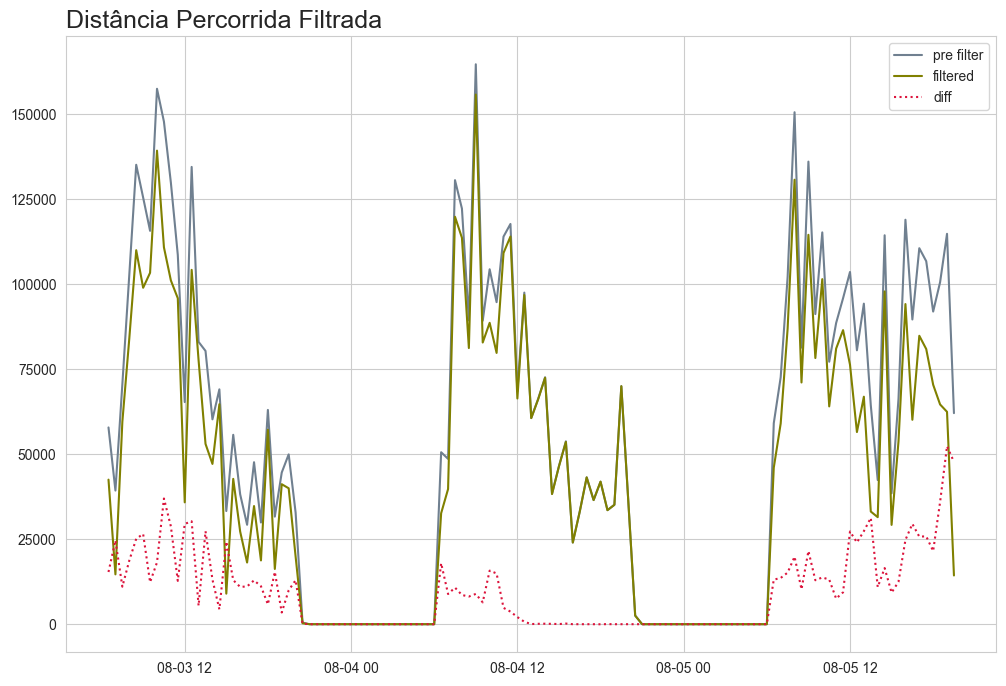

In [18]:
dist_interval_filtered_df = pd.DataFrame(np.stack([times_axis, dist_interval], axis = 1), columns = ["time", "dist_filtered"])

plt.figure(figsize = [12,8])
plt.plot(dist_interval_df["time"], dist_interval_df["dist"], color = "slategray", label = "pre filter")
plt.plot(dist_interval_filtered_df["time"], dist_interval_filtered_df["dist_filtered"], label = "filtered", color = "olive")
plt.plot(dist_interval_filtered_df["time"], dist_interval_df["dist"] - dist_interval_filtered_df["dist_filtered"], 
         ":", label = "diff", color = "crimson")
plt.title("Distância Percorrida Filtrada", loc = "left", fontsize = 18)
plt.legend()
plt.show()

> # Exportando dados

In [19]:
taxa_de_conversao = 30.5/705 #cm/px 

In [25]:
pd.DataFrame(filtered_mask, columns = ["filtered_mask"]).to_csv("{}_filtered_mask.csv".format(animal), index = False)
resultado_analise_df = pd.merge(dist_interval_df, dist_interval_filtered_df, on = "time")
resultado_analise_df["dist_filtered (cm)"] = resultado_analise_df["dist_filtered"]*taxa_de_conversao
resultado_analise_df["dist_filtered (m)"] = resultado_analise_df["dist_filtered"]*taxa_de_conversao*(1/100)
resultado_analise_df.to_excel("data/track_dist_{}_new.xlsx".format(animal), index = False)

resultado_analise_df

,time,dist,dist_filtered,dist_filtered (cm),dist_filtered (m)
0,2019-08-03 06:30:24.000069,57892.227743,42534.247283,1840.134102,18.401341
1,2019-08-03 07:00:24.000072,39322.989169,14662.899273,634.35238,6.343524
2,2019-08-03 07:30:24.000074,70593.485213,59562.215662,2576.805075,25.768051
3,2019-08-03 08:00:24.000074,102771.617341,84037.9154,3635.682865,36.356829
4,2019-08-03 08:30:24.000075,135175.979612,110039.776258,4760.586065,47.605861
...,...,...,...,...,...
57,2019-08-05 06:00:27.000092,0.0,0.0,0.0,0.0
58,2019-08-05 06:30:23.000048,59132.088485,46027.247768,1991.249726,19.912497
59,2019-08-05 07:00:23.000051,72684.726435,59077.80505,2555.848304,25.558483
60,2019-08-05 07:30:23.000053,102173.823748,86991.565281,3763.464881,37.634649


In [30]:
filtered_mask_df = pd.DataFrame(filtered_mask, columns=["mask"])
filtered_mask_df.to_csv("data/{}_mask.csv".format(animal), index=False)
filtered_mask_df

,mask
0,False
1,False
2,False
3,False
4,False
...,...
7148471,True
7148472,True
7148473,True
7148474,True


In [31]:
# 0 declarando variavies -------------------------------------------------------------------------------------------
dataSet_all = pd.DataFrame([])

td3h = timedelta(minutes=0, hours=3)
td5h = timedelta(minutes=0, hours=5)
td7h30m = timedelta(minutes=30, hours=7)

list3h = []
list5h = []
list7h30m = []
list_day = []

count_3h = -1
count_5h = -1
count_7h30m = -1
count_day = -1
dict_3h = {}
dict_5h = {}
dict_7h30m = {}
dict_day = {}

format_data = "%d/%m/%y %H:%M:%S"

first_day = True
last_day = False
begin = False
on = 0

dia_check = 0 
mes_check = 0

for filename in tq.tqdm(list_filenames): ## for geral que irá caminhar por cada filename
    
    # 1 lendo filename ---------------------------------------------------------------------------------------------
    dataSet = pd.read_csv(filename,names = ['update_rate','coord_x','coord_y','x','time_h','time_m','time_s']) ## lendo filename
    dataSet_all = pd.concat([dataSet_all, dataSet])
    dataSet_np = np.array(dataSet) ## transformando em numpy array para ganhar velocidade de processamento
    # --------------------------------------------------------------------------------------------------------------
    
    # 2 separando os dados de tempo e coordenada -------------------------------------------------------------------
    timet = dataSet_np[:,4:] 
    # --------------------------------------------------------------------------------------------------------------
    
    for i in range(len(timet)): ## for que irá caminhar por cada linha da tabela lida
        
        # 3 extraindo os dados de tempo ----------------------------------------------------------------------------
        ano = int(filename[len(filename)-17:len(filename)-13])
        mes = int(strtomonth(filename[len(filename)-21:len(filename)-18]))
        dia = int(filename[len(filename)-24:len(filename)-22])
        hora = int(timet[i,0])
        minu = int(timet[i,1])
        seg = int(timet[i,2])
        mics = int(100*(dataSet_np[i,6]%1))
        # ---------------------------------------------------------------------------------------------------------- 
        
        # 5 resolvendo problemas ====================================================================================
        # PROBLEMA : quando temos arquivos q começam em um dia e terminam no outro as primeiras linhas receberão er-
        # roneamente os dados de dia e mês do dia seguinte; 
        # OBS.: os dados de ano, mes e dia são retirados do nome do arquivo que são nomeados com a data do final do
        # intervalo de registro (17 minutos).

        if dia_check != dia:
            if hora == 23:
                dia = dia_check
            else:
                dia_check = dia

        if mes_check != mes:
            if hora == 23:
                mes = mes_check
            else:
                mes_check = mes
        # ==========================================================================================================
        
        time = datetime(ano,mes,dia,hora,minu,seg,mics)
        
        # 4 checando ligar/desligar da luz -------------------------------------------------------------------------
        if (time >= light_on[on]) and (not last_day):
            
            if begin == False:
                print("light on", time)
                
                count_3h += 1
                count_5h += 1
                count_7h30m += 1
                count_day += 1

                target_time_3h = datetime(ano,mes,dia,hora,minu,seg,mics)
                target_time_5h = datetime(ano,mes,dia,hora,minu,seg,mics)
                target_time_7h30m = datetime(ano,mes,dia,hora,minu,seg,mics)
                target_time_day = datetime(ano,mes,dia,hora,minu,seg,mics)
                
                dict_3h[count_3h] = target_time_3h
                dict_5h[count_5h] = target_time_5h
                dict_7h30m[count_7h30m] = target_time_7h30m
                dict_day[count_day] = target_time_day

                begin = True
                first_day = False

            else:
                if time - target_time_3h >= td3h:
                    target_time_3h = datetime(ano,mes,dia,hora,minu,seg,mics)
                    
                    count_3h += 1
                    dict_3h[count_3h] = target_time_3h
                if time - target_time_5h >= td5h:
                    target_time_5h = datetime(ano,mes,dia,hora,minu,seg,mics)
                    
                    count_5h += 1
                    dict_5h[count_5h] = target_time_5h
                if time - target_time_7h30m >= td7h30m:
                    target_time_7h30m = datetime(ano,mes,dia,hora,minu,seg,mics)
                    
                    count_7h30m += 1
                    dict_7h30m[count_7h30m] = target_time_7h30m

            list3h.append(count_3h)
            list5h.append(count_5h)
            list7h30m.append(count_7h30m)
            list_day.append(count_day)
            
            if time - light_on[on] >= quinze_horas:
                begin = False
                
                if on < len(light_on)-1:
                    on += 1
                else:
                    last_day = True
                    

  0%|          | 0/240 [00:00<?, ?it/s]

light on 2019-08-03 06:00:24.000069
light on 2019-08-04 06:00:27.000089
light on 2019-08-05 06:00:23.000048


In [32]:
groups_dict = {"day":list_day, "3h":list3h, "5h":list5h, "7h30m":list7h30m}
for group in tq.tqdm(groups_dict):
    dataSet_all[group] = groups_dict[group]

  0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
dataSet_all

,update_rate,coord_x,coord_y,x,time_h,time_m,time_s,day,3h,5h,7h30m
0,0.159630,271.53,102.97,858,6,6,0.190,None,None,None,None
1,0.032276,272.14,102.17,850,6,6,2.977,None,None,None,None
2,0.027195,266.01,101.73,910,6,6,5.607,None,None,None,None
3,0.027334,266.43,102.23,956,6,6,8.329,None,None,None,None
4,0.041523,274.12,103.38,606,6,6,11.246,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
30595,0.000000,0.00,0.00,1634,19,41,30.623,05/08/19 06:00:23,05/08/19 18:00:23,05/08/19 16:00:23,05/08/19 13:30:23
30596,0.000000,0.00,0.00,1639,19,41,30.675,05/08/19 06:00:23,05/08/19 18:00:23,05/08/19 16:00:23,05/08/19 13:30:23
30597,0.000000,0.00,0.00,1647,19,41,30.706,05/08/19 06:00:23,05/08/19 18:00:23,05/08/19 16:00:23,05/08/19 13:30:23
30598,0.000000,0.00,0.00,1648,19,41,30.739,05/08/19 06:00:23,05/08/19 18:00:23,05/08/19 16:00:23,05/08/19 13:30:23


In [4]:
dataSet_all = pd.read_parquet(r"C:\Users\lukan\Desktop\report.parquet")

In [27]:
plot_interval = "3h"
values = dataSet_all[plot_interval].dropna().unique()

if plot_interval == "3h":
    j_subplot = 5
    i_subplot = np.ceil(len(values) / j_subplot)
elif plot_interval == "5h":
    j_subplot = 3
    i_subplot = np.ceil(len(values) / j_subplot)
elif plot_interval == "7h30m":
    j_subplot = 2
    i_subplot = np.ceil(len(values) / j_subplot)
else:
    j_subplot = 1
    i_subplot = np.ceil(len(values) / j_subplot)

In [28]:
step = 5
y_cats = list(range(0,240+step, step))
x_cats = list(range(0,320+step, step))
y_labels = [(y_cats[i]+y_cats[i+1])/2 for i in range(len(y_cats)-1)]
x_labels = [(x_cats[i]+x_cats[i+1])/2 for i in range(len(x_cats)-1)]

dataSet_all["coord_x_cat"] = pd.cut(dataSet_all["coord_x"].replace([120.5, 160.5], np.nan), bins=x_cats, labels=x_labels)
dataSet_all["coord_y_cat"] = pd.cut(dataSet_all["coord_y"].replace([120.5, 160.5], np.nan), bins=y_cats, labels=y_labels)

C:\Users\lukan\AppData\Local\Temp\ipykernel_23912\614842027.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.hist2d(df["coord_x_cat"], df["coord_y_cat"], bins=[x_cats, y_cats], cmap="turbo")


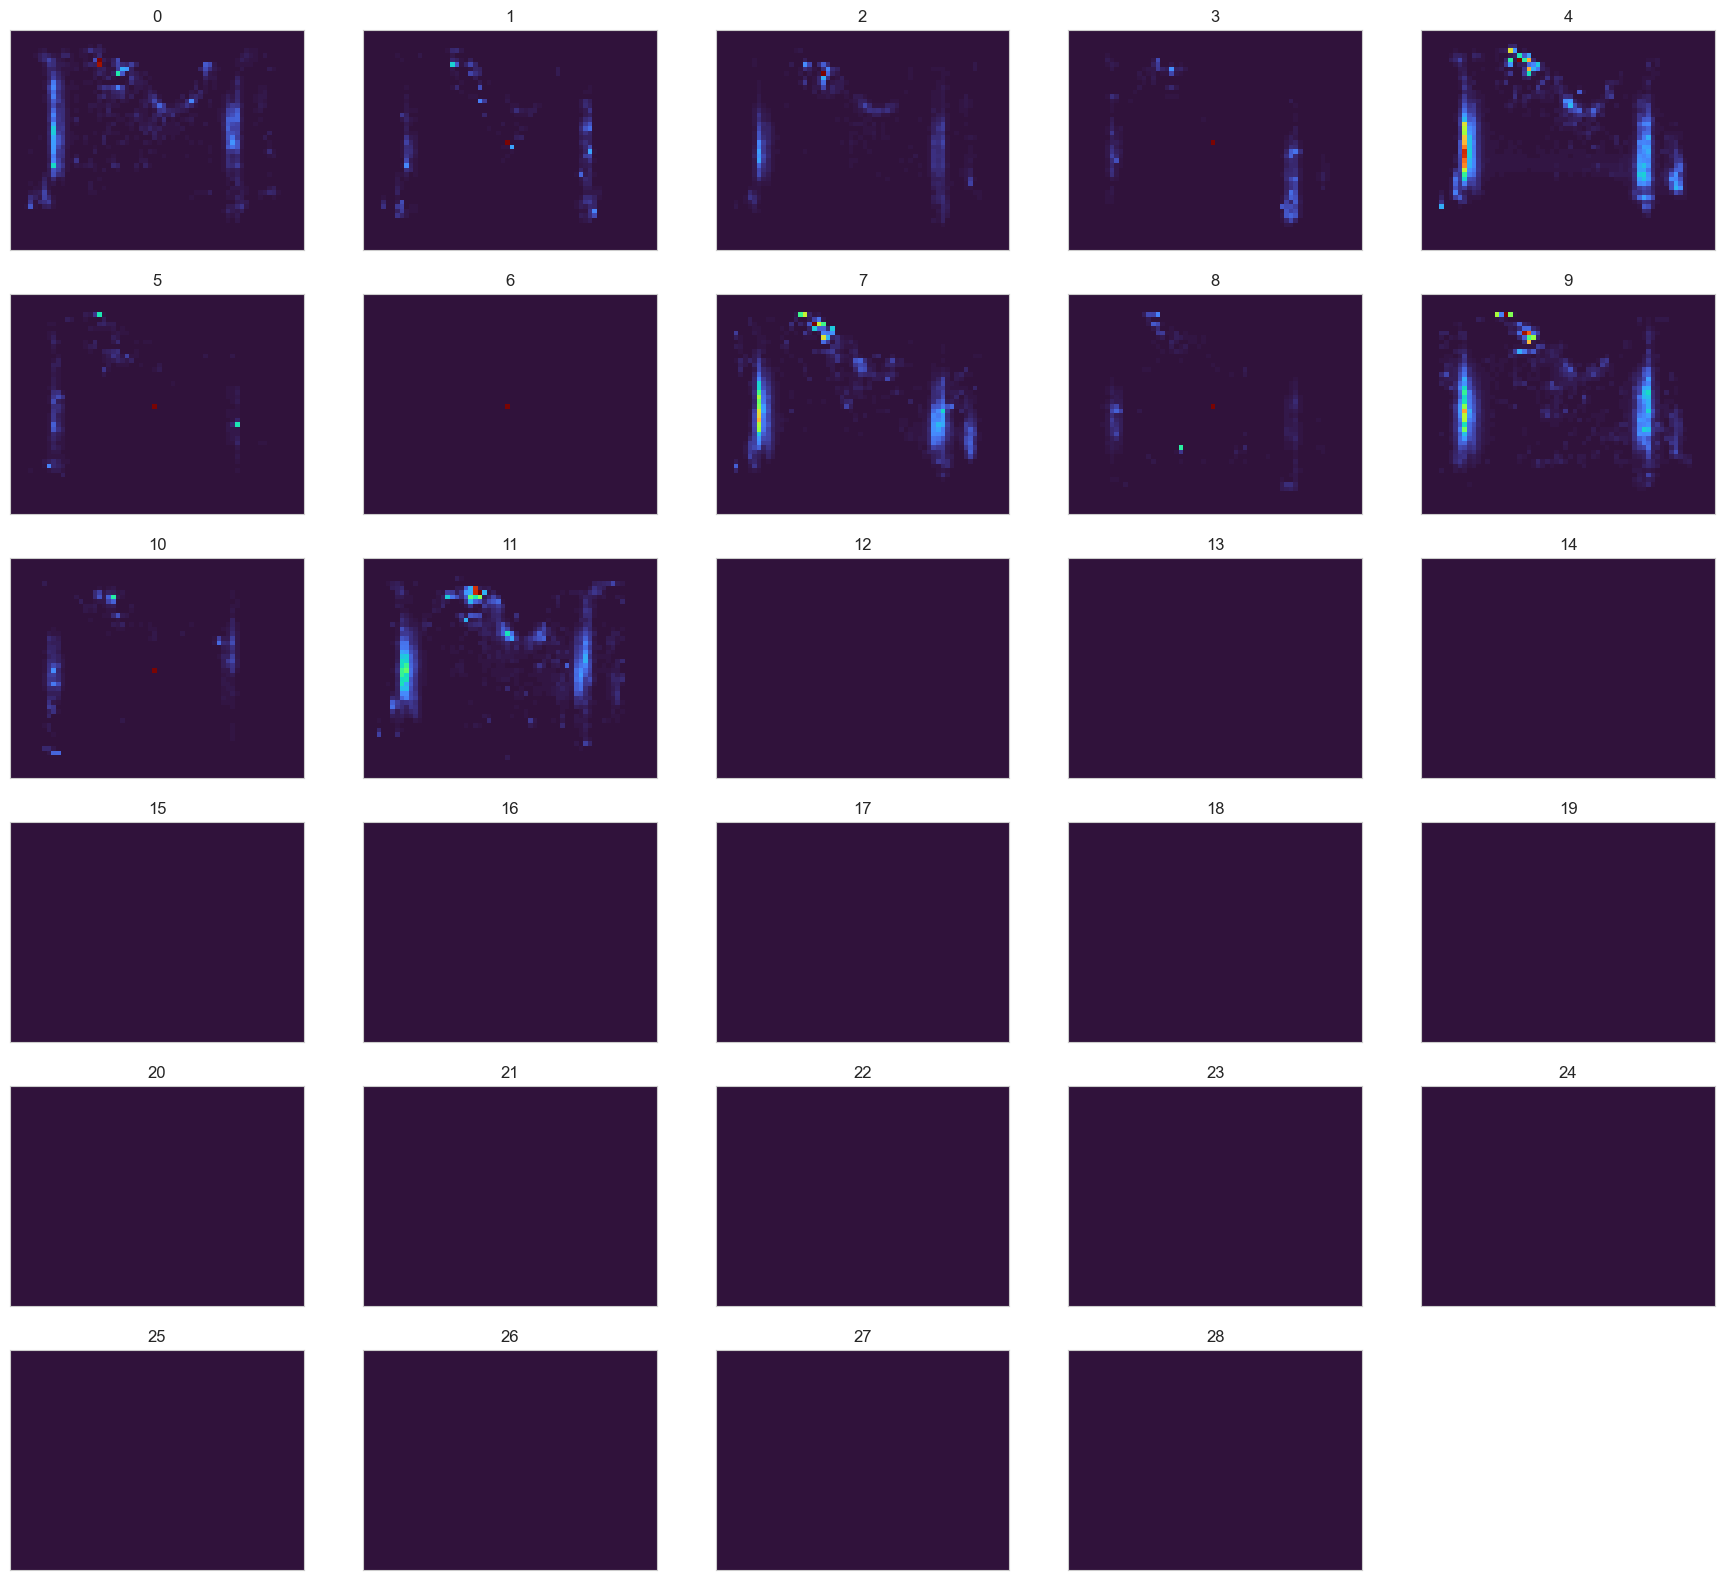

In [31]:
fig = plt.figure(figsize=(22, 20))

for i, value in enumerate(values):
    df = dataSet_all[dataSet_all["7h30m"] == value][["coord_x_cat", "coord_y_cat"]].dropna()

    ax = fig.add_subplot(int(i_subplot), int(j_subplot),i+1)
    ax.hist2d(df["coord_x_cat"], df["coord_y_cat"], bins=[x_cats, y_cats], cmap="turbo")
    ax.set_title(value)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")